# Descriptor evaluation on the RDNIM dataset

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import brewer2mpl

from lisrd.evaluation.rdnim_evaluation import run_descriptor_evaluation
%matplotlib inline
%load_ext autoreload
%autoreload 2

## Day reference

In [2]:
config = {
    'name': 'rdnim',
    'data_path': '/home/remi/Documents/datasets/RDNIM/',
    'reference': 'day',
    'batch_size': 1,
    'test_batch_size': 1,
    'sizes': {'test': 1722},
    'models_name': ['kornia_sift', 'hard_net', 'sos_net', 'superpoint', 'd2_net', 'r2d2', 'gift', 'lisrd'],
    'num_kp': 1000,
    'correctness_threshold': 3,
    'max_mma_threshold': 10
}

In [3]:
H_estimation_day, precision_day, recall_day, mma_day = run_descriptor_evaluation(config)

  0%|          | 0/1722 [00:00<?, ?it/s]/home/remi/env_cvg/lib/python3.7/site-packages/torch/nn/functional.py:2705: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "
100%|██████████| 1722/1722 [34:44<00:00,  1.21s/it]


In [4]:
metrics_day = {'Homography estimation': H_estimation_day, 'Precision': precision_day, 'Recall': recall_day}
for metric, value in metrics_day.items():
    print(metric)
    for m in config['models_name']:
        print(m + ':', value[m])
    print()

Homography estimation
kornia_sift: 0.13414634146341464
hard_net: 0.24912891986062718
sos_net: 0.2264808362369338
superpoint: 0.17828106852497097
d2_net: 0.12369337979094076
r2d2: 0.19047619047619047
gift: 0.22473867595818817
lisrd: 0.31765389082462253

Precision
kornia_sift: 0.18355512131446428
hard_net: 0.22474881225426488
sos_net: 0.21816801303179498
superpoint: 0.1910382605991934
d2_net: 0.1961051046185045
r2d2: 0.1730215881934684
gift: 0.1545014089638487
lisrd: 0.406078372854332

Recall
kornia_sift: 0.12512263344847185
hard_net: 0.22432406006357006
sos_net: 0.2259179001111414
superpoint: 0.21405184161541485
d2_net: 0.145229408364766
r2d2: 0.17977226834090218
gift: 0.14880119748386259
lisrd: 0.43932410745796496



## Night reference

In [5]:
config['reference'] = 'night'
H_estimation_night, precision_night, recall_night, mma_night = run_descriptor_evaluation(config)

100%|██████████| 1722/1722 [23:14<00:00,  1.23it/s]


In [6]:
metrics_night = {'Homography estimation': H_estimation_night, 'Precision': precision_night, 'Recall': recall_night}
for metric, value in metrics_night.items():
    print(metric)
    for m in config['models_name']:
        print(m + ':', value[m])
    print()

Homography estimation
kornia_sift: 0.18583042973286876
hard_net: 0.3246225319396051
sos_net: 0.25203252032520324
superpoint: 0.2346109175377468
d2_net: 0.1951219512195122
r2d2: 0.22938443670150988
gift: 0.29442508710801396
lisrd: 0.3914053426248548

Precision
kornia_sift: 0.2394181943102494
hard_net: 0.3594836494571669
sos_net: 0.2881759850041664
superpoint: 0.2592562220046084
d2_net: 0.26482258773310396
r2d2: 0.23702571893713856
gift: 0.24001979054907735
lisrd: 0.4876070726108521

Recall
kornia_sift: 0.18195317384222545
hard_net: 0.36522956114917315
sos_net: 0.2956177897293451
superpoint: 0.2956781481706359
d2_net: 0.21791834875296712
r2d2: 0.2368004015165603
gift: 0.2291656999020432
lisrd: 0.5196116515697409



## MMA curves

In [7]:
def plot_mma(config, captions, mma_day, mma_night):
    models = config['models_name']
    n_models = len(models)
    
    colors = np.array(brewer2mpl.get_map('Set2', 'qualitative', 8).mpl_colors)[:n_models]
    linestyles = ['-'] * n_models
    plt_lim = [1, config['max_mma_threshold']]
    plt_rng = np.arange(plt_lim[0], plt_lim[1] + 1)

    plt.rc('axes', titlesize=25)
    plt.rc('axes', labelsize=25)
    plt.figure(figsize=(15, 5))

    # Plot for the day reference
    plt.subplot(1, 2, 1)
    for model, caption, color, ls in zip(models, captions, colors, linestyles):
        plt.plot(plt_rng, mma_day[model], color=color, ls=ls, linewidth=3, label=caption)
    plt.title('Day reference')
    plt.xlabel('Threshold [px]')
    plt.xlim(plt_lim)
    plt.xticks(plt_rng)
    plt.ylabel('Precision')
    plt.ylim([0, 0.7])
    plt.grid()
    plt.tick_params(axis='both', which='major', labelsize=20)

    # Plot for the night reference
    plt.subplot(1, 2, 2)
    for model, caption, color, ls in zip(models, captions, colors, linestyles):
        plt.plot(plt_rng, mma_night[model], color=color, ls=ls, linewidth=3, label=caption)
    plt.title('Night reference')
    plt.xlabel('Threshold [px]')
    plt.xlim(plt_lim)
    plt.xticks(plt_rng)
    plt.ylim([0, 0.7])
    plt.gca().axes.set_yticklabels([])
    plt.grid()
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0, fontsize=20)

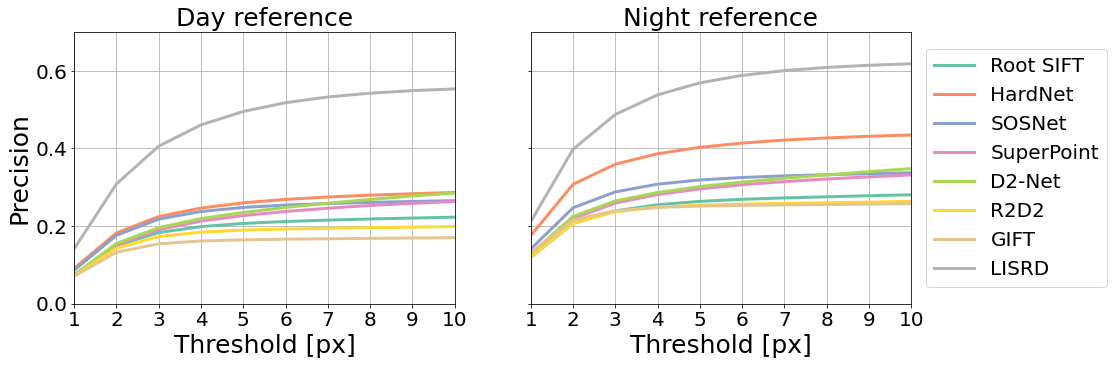

In [8]:
captions = ['Root SIFT', 'HardNet', 'SOSNet', 'SuperPoint', 'D2-Net', 'R2D2', 'GIFT', 'LISRD']
plot_mma(config, captions, mma_day, mma_night)